# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%load_ext autoreload
%autoreload 2

# UV News Data Input

In [1]:
import pandas as pd
import numpy as np

true_path = 'C:\\Users\\LENOVO\\Downloads\\True.csv\\True.csv'
fake_path = 'C:\\Users\\LENOVO\\Downloads\\Fake.csv\\Fake.csv'

true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

In [2]:
display(true_df)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [3]:
display(fake_df)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


# Data Visulization

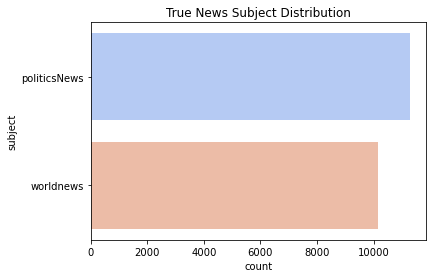

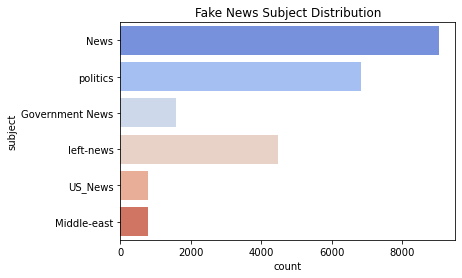

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(y="subject", palette="coolwarm", data=true_df).set_title('True News Subject Distribution')
plt.show()

sns.countplot(y="subject", palette="coolwarm", data=fake_df).set_title('Fake News Subject Distribution')
plt.show()

## Real News Word Cloud

In [5]:
!pip install wordcloud
from wordcloud import WordCloud

real_titles = true_df.title
real_titles_ls = [text for text in real_titles]
# print(alls)
real_all_words = ' '.join(real_titles)
wordcloud_real = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(real_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

## Fake News Word Cloud

In [8]:
fake_titles = fake_df.title
fake_titles_ls = [text for text in fake_titles]
# print(alls)
fake_all_words = ' '.join(fake_titles)
wordcloud_fake = WordCloud(background_color='white',
    width= 800, height= 500,
    max_font_size = 180,
    collocations = False).generate(fake_all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

# Data Preprocessing

## Data Combination

In [6]:
# Add Labels to both df
true_df['true'] = 1
fake_df['true'] = 0

# Concat
df = pd.concat([true_df, fake_df])
display(df)

,title,text,subject,date,true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Inspect Lengths of News

In [7]:
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 44898
Max length of the titles: 42
Mean length of the titles: 12.453472315025168


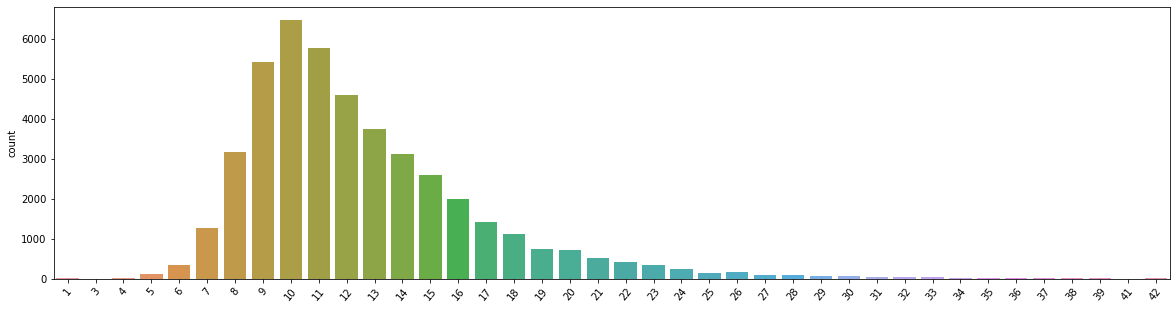

In [8]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [9]:
texts = [text for text in df.text]

max_len = 0
texts_len = []
for text in texts:
    texts_len.append(len(text.split()))
    max_len = max(len(text.split()), max_len)

# g = sns.countplot(x=texts_len)
print('Mean length of the texts:', np.mean(texts_len))

Mean length of the texts: 405.28228428883244


## Purify & Shffle the DataFrame

In [10]:
from sklearn.utils import shuffle

# Purify
df = df.iloc[:,[0, -1]]

# Shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,BREAKING: SCHIZOPHRENIC COMMANDER IN CHIEF Sen...,0
1,Temporary U.S. government funding bill hits sn...,1
2,"BOOM! TED CRUZ, DESANTIS PUSH For Term Limits:...",0
3,AWESOME! SEAN SPICER Gives Trump’s Salary Away...,0
4,Trump's dilemma: slower job growth or rising r...,1
...,...,...
44893,FOREIGN BORN ALIEN WITH 4 FELONIES ARRESTED FO...,0
44894,BEN CARSON Speaks Out On Trump Controversy…Dem...,0
44895,AG Sessions Directs Disgusting Insult At Hawa...,0
44896,Q&A: What we know about U.S. probes of Russian...,1


## Split Data into Training, Validation, Test

In [11]:
train_val_df = df.sample(frac = 0.8)
test_df = df.drop(train_val_df.index)

train_df = train_val_df.sample(frac = 0.8)
val_df = train_val_df.drop(train_df.index)

# Reset Index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)
print('testset size:', test_df.shape)

trainset size: (28734, 2)
valset size: (7184, 2)
testset size: (8980, 2)


## Data distribution imbalanced

In [15]:
# train_imbalanced = 1/10
# val_imbalanced = 1/10
# test_imbalanced = 1/10

# train_true = train_df[train_df['true'] == 1]
# train_fake = train_df[train_df['true'] == 0]
# train_fake = train_fake.iloc[:round(len(train_fake)*train_imbalanced),:]
# train_true_len = len(train_true)
# train_fake_len = len(train_fake)
# train_df = pd.concat([train_true, train_fake])

# val_true = val_df[val_df['true'] == 1]
# val_fake = val_df[val_df['true'] == 0]
# val_fake = val_fake.iloc[:round(len(val_fake)*val_imbalanced),:]
# val_true_len = len(val_true)
# val_fake_len = len(val_fake)
# val_df = pd.concat([val_true, val_fake])

# test_true = test_df[test_df['true'] == 1]
# test_fake = test_df[test_df['true'] == 0]
# test_fake = test_fake.iloc[:round(len(test_fake)*test_imbalanced),:]
# test_true_len = len(test_true)
# test_fake_len = len(test_fake)
# test_df = pd.concat([test_true, test_fake])

# len_df = pd.DataFrame({'ind': ['Train', 'Validation', 'Test'], 'True': [train_true_len, val_true_len, test_true_len], 'Fake': [train_fake_len, val_fake_len, test_fake_len]})
# len_df.set_index('ind', inplace=True)
# len_df.index.name = None

# len_df

## Dataframe to csv

In [12]:
train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)
test_df.to_csv('test.tsv', sep='\t', index=False)

## Concatenate all dataframe

In [13]:
df = pd.concat([train_df, val_df, test_df])
df

,title,true
0,Trump Literally Just Said He’d Take Guns Away...,0
1,Fighting in southern Philippine city may end i...,1
2,U.S. retailers bet on Congress over Bolivia to...,1
3,INDIANA: “BLACK MALE” FIRES Several SHOTS At T...,0
4,BREAKING! H.R. MCMASTER Explains Why Washingto...,0
...,...,...
8975,California voting expert bares naked truth abo...,1
8976,"Still Butthurt About 2011 Event, Trump Refuse...",0
8977,Trump says he will negotiate with Democrats on...,1
8978,Q&A: What we know about U.S. probes of Russian...,1


## Performing Data Cleaning

In [14]:
import nltk
# Downloading Stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Obtaining Additional Stopwords From nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [16]:
# Removing Stopwords And Remove Words With 2 Or Less Characters
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [17]:
# !pip install gensim
import gensim

# Applying The Function To The Dataframe
df['clean'] = df['title'].apply(preprocess)

## Obtaining The Total Words Present In The Dataset

In [18]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

total_words = len(list(set(list_of_words)))
total_words

19174

## Preparing The Data By Performing Tokenization And Padding

In [19]:
from nltk import word_tokenize

In [20]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Creating A Tokenizer To Tokenize The Words And Create Sequences Of Tokenized Words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(train_df['title'])

train_sequences = tokenizer.texts_to_sequences(train_df['title'])
val_sequences = tokenizer.texts_to_sequences(val_df['title'])
test_sequences = tokenizer.texts_to_sequences(test_df['title'])

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_val = pad_sequences(val_sequences,maxlen = 42, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 42, padding = 'post', truncating = 'post')

# LSTM

## Building And Training LSTM Model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout, BatchNormalization

## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=42))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 42, 40)            766960    
                                                                 
 dropout_4 (Dropout)         (None, 42, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 823461 (3.14 MB)
Trainable params: 823461 (3.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [54]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])
# len(padded_train[0])
# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 12s 23ms/step - loss: 0.1882 - accuracy: 0.9157 - val_loss: 0.0882 - val_accuracy: 0.9688
Epoch 2/3
449/449 [==============================] - 12s 27ms/step - loss: 0.0552 - accuracy: 0.9816 - val_loss: 0.0942 - val_accuracy: 0.9706
Epoch 3/3
449/449 [==============================] - 12s 26ms/step - loss: 0.0312 - accuracy: 0.9905 - val_loss: 0.0881 - val_accuracy: 0.9670


## Assessing Trained Model Performance

281/281 [==============================] - 1s 4ms/step
LSTM Model Accuracy :  0.9668151447661469
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4781
           1       0.95      0.98      0.97      4199

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



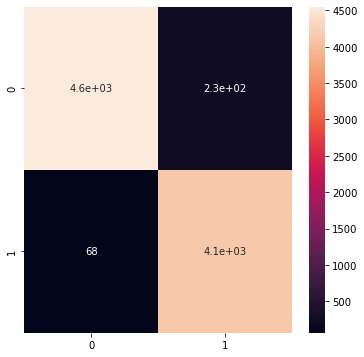

In [55]:
# Making prediction
def predict_classes(model, test):
    prediction = model.predict(padded_test)
    prediction = (prediction>0.5).astype(int)
    return prediction
    
prediction = predict_classes(model, padded_test)
# prediction = (prediction>0.5).astype(int)
prediction

# Getting The Accuracy
from sklearn.metrics import accuracy_score
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

# Bidirectional LSTM

## Building And Training Bidirectional LSTM Model

In [56]:
## Creating model Using LSTM
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=42))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 42, 40)            766960    
                                                                 
 dropout_6 (Dropout)         (None, 42, 40)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 200)               112800    
 onal)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 879961 (3.36 MB)
Trainable params: 879961 (3.36 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [57]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 14s 27ms/step - loss: 0.1973 - accuracy: 0.9162 - val_loss: 0.0903 - val_accuracy: 0.9662
Epoch 2/3
449/449 [==============================] - 14s 32ms/step - loss: 0.0507 - accuracy: 0.9824 - val_loss: 0.0735 - val_accuracy: 0.9719
Epoch 3/3
449/449 [==============================] - 15s 33ms/step - loss: 0.0234 - accuracy: 0.9930 - val_loss: 0.0853 - val_accuracy: 0.9723


## Assessing Trained Model Performance

281/281 [==============================] - 3s 7ms/step
Bidirectional LSTM Model Accuracy :  0.9736080178173719
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4781
           1       0.97      0.98      0.97      4199

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



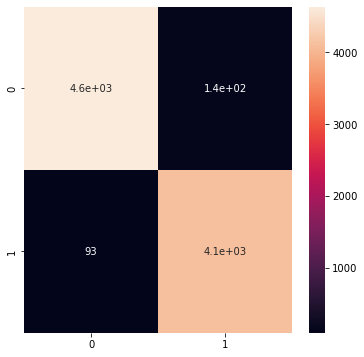

In [58]:
# Making prediction
prediction = predict_classes(model, padded_test)
# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("Bidirectional LSTM Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))

# CNN-BiLSTM

## Building And Training CNN Model

In [61]:
## Creating model Using CNN
embedding_vector_features=40
model=Sequential()
model.add(Embedding(total_words,embedding_vector_features,input_length=42))

model.add(Dropout(0.3))

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Conv1D(32, 5, activation='relu'))
model.add(MaxPool1D())

model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 42, 40)            766960    
                                                                 
 dropout_10 (Dropout)        (None, 42, 40)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 38, 32)            6432      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 19, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 32)            5152      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                 

In [62]:
y_train = np.asarray(train_df['true'])
y_val = np.asarray(val_df['true'])

# Training the model
model.fit(padded_train, y_train, batch_size = 64, validation_data=(padded_val, y_val), epochs = 3)

Epoch 1/3
449/449 [==============================] - 8s 12ms/step - loss: 0.1728 - accuracy: 0.9210 - val_loss: 0.0865 - val_accuracy: 0.9683
Epoch 2/3
449/449 [==============================] - 5s 10ms/step - loss: 0.0440 - accuracy: 0.9850 - val_loss: 0.0863 - val_accuracy: 0.9708
Epoch 3/3
449/449 [==============================] - 4s 10ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0881 - val_accuracy: 0.9691


## Assessing Trained Model Performance

281/281 [==============================] - 1s 2ms/step
CNN Model Accuracy :  0.9708240534521159
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      4781
           1       0.97      0.96      0.97      4199

    accuracy                           0.97      8980
   macro avg       0.97      0.97      0.97      8980
weighted avg       0.97      0.97      0.97      8980



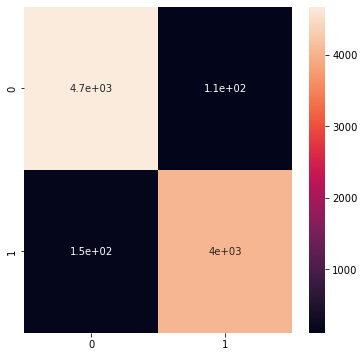

In [63]:
# Making prediction
prediction = predict_classes(model, padded_test)

# Getting The Accuracy
y_test = np.asarray(test_df['true'])

accuracy = accuracy_score(list(y_test), prediction)

print("CNN Model Accuracy : ", accuracy)


# Getting The Confusion Matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True)

print(classification_report(y_test, prediction))

# BERT

In [65]:
!pip install typing_extensions

In [22]:
!pip install transformers
!pip install torch

import torch
from transformers import BertTokenizer

In [23]:
PRETRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

C:\Users\LENOVO\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Load Dataset Class

In [24]:
from torch.utils.data import Dataset

class FakeNewsDataset(Dataset):
    def __init__(self, mode, tokenizer):
        assert mode in ['train', 'val', 'test']
        self.mode = mode
        self.df = pd.read_csv(mode + '.tsv', sep='\t').fillna("")
        self.len = len(self.df)
        self.tokenizer = tokenizer  # BERT tokenizer
    
    # 定義回傳一筆訓練 / 測試數據的函式
    def __getitem__(self, idx):
        if self.mode == 'test':
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
        else:
            statement, label = self.df.iloc[idx, :].values
            label_tensor = torch.tensor(label)
            
        # 建立第一個句子的 BERT tokens 並加入分隔符號 [SEP]
        word_pieces = ['[CLS]']
        statement = self.tokenizer.tokenize(statement)
        word_pieces += statement + ['[SEP]']
        len_st = len(word_pieces)
        
#         # 第二個句子的 BERT tokens
#         tokens_b = self.tokenizer.tokenize(text_b)
#         word_pieces += tokens_b + ["[SEP]"]
#         len_b = len(word_pieces) - len_a
        
        # 將整個 token 序列轉換成索引序列
        ids = self.tokenizer.convert_tokens_to_ids(word_pieces)
        tokens_tensor = torch.tensor(ids)
        
        # 將第一句包含 [SEP] 的 token 位置設為 0
        segments_tensor = torch.tensor([0] * len_st, dtype=torch.long)
        
        return (tokens_tensor, segments_tensor, label_tensor)
    
    def __len__(self):
        return self.len
    
    
# Initialize Datasets for Transformation
trainset = FakeNewsDataset('train', tokenizer=tokenizer)
valset = FakeNewsDataset('val', tokenizer=tokenizer)
testset = FakeNewsDataset('test', tokenizer=tokenizer)

print('trainset size:' ,trainset.__len__())
print('valset size:',valset.__len__())
print('testset size: ',testset.__len__())

trainset size: 28734
valset size: 7184
testset size:  8980


## Sampling and Observing Tensors

In [25]:
# 選擇第一個樣本
sample_idx = 0

# 將原始文本拿出做比較
statement, label = trainset.df.iloc[sample_idx].values

# 利用剛剛建立的 Dataset 取出轉換後的 id tensors
tokens_tensor, segments_tensor, label_tensor = trainset[sample_idx]

# 將 tokens_tensor 還原成文本
tokens = tokenizer.convert_ids_to_tokens(tokens_tensor.tolist())
combined_text = " ".join(tokens)

# 渲染前後差異，毫無反應就是個 print。可以直接看輸出結果
print(f"""
original_statement: 
{statement}

tokens: 
{tokens}

label: {label}

--------------------

tokens_tensor: 
{tokens_tensor}

segments_tensor: 
{segments_tensor}

label_tensor: 
{label_tensor}

""")


original_statement: 
 Trump Literally Just Said He’d Take Guns Away From Anyone Without Due Process

tokens: 
['[CLS]', 'trump', 'literally', 'just', 'said', 'he', '’', 'd', 'take', 'guns', 'away', 'from', 'anyone', 'without', 'due', 'process', '[SEP]']

label: 0

--------------------

tokens_tensor: 
tensor([ 101, 8398, 6719, 2074, 2056, 2002, 1521, 1040, 2202, 4409, 2185, 2013,
        3087, 2302, 2349, 2832,  102])

segments_tensor: 
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

label_tensor: 
0




## Reforming the Dataset to Fit the Model

In [26]:
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence

# 這個函式的輸入 `samples` 是一個 list，裡頭的每個 element 都是
# 剛剛定義的 `FakeNewsDataset` 回傳的一個樣本，每個樣本都包含 3 tensors：
# - tokens_tensor
# - segments_tensor
# - label_tensor
# 它會對前兩個 tensors 作 zero padding，並產生前面說明過的 masks_tensors
def create_mini_batch(samples):
    tokens_tensors = [s[0] for s in samples]
    segments_tensors = [s[1] for s in samples]
    
    # 測試集有 labels
    if samples[0][2] is not None:
        label_ids = torch.stack([s[2] for s in samples])
    else:
        label_ids = None
    
    # Zero Padding
    tokens_tensors = pad_sequence(tokens_tensors, batch_first=True)
    segments_tensors = pad_sequence(segments_tensors, batch_first=True)
    
    # attention masks，將 tokens_tensors 裡頭不為 zero padding
    # 的位置設為 1 讓 BERT 只關注這些位置的 tokens
    masks_tensors = torch.zeros(tokens_tensors.shape, dtype=torch.long)
    masks_tensors = masks_tensors.masked_fill(tokens_tensors != 0, 1)
    
    return tokens_tensors, segments_tensors, masks_tensors, label_ids


# 初始化一個每次回傳 16 個訓練樣本的 DataLoader
# 利用 `collate_fn` 將 list of samples 合併成一個 mini-batch 是關鍵
BATCH_SIZE = 16
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
valloader = DataLoader(valset, batch_size=BATCH_SIZE, collate_fn=create_mini_batch)
testloader = DataLoader(testset, batch_size=BATCH_SIZE,collate_fn=create_mini_batch)

In [27]:
data = next(iter(trainloader))

tokens_tensors, segments_tensors, masks_tensors, label_ids = data

print(f"""
tokens_tensors.shape   = {tokens_tensors.shape} 
{tokens_tensors}
------------------------
segments_tensors.shape = {segments_tensors.shape}
{segments_tensors}
------------------------
masks_tensors.shape    = {masks_tensors.shape}
{masks_tensors}
------------------------
label_ids.shape        = {label_ids.shape}
{label_ids}
""")


tokens_tensors.shape   = torch.Size([16, 32]) 
tensor([[  101,  8398,  6719,  2074,  2056,  2002,  1521,  1040,  2202,  4409,
          2185,  2013,  3087,  2302,  2349,  2832,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [  101,  3554,  1999,  2670,  7802,  2103,  2089,  2203, 17566,  2135,
          1011,  2510,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [  101,  1057,  1012,  1055,  1012, 16629,  6655,  2006,  3519,  2058,
         11645,  2000, 16215, 18367,  8398,  3675,  4171,  3277,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [  101,  5242,  1024,  1523,  2304,  3287,  1524,  8769,  2195,  7171,
          2012,  4744,  2007,  2191,  2637,  2307,  2153,  1010,  3915,  9245,
          1

## Model Construction

In [28]:
from transformers import BertForSequenceClassification
from IPython.display import display, clear_output

PRETRAINED_MODEL_NAME = "bert-base-uncased"
NUM_LABELS = 2

model = BertForSequenceClassification.from_pretrained(
    PRETRAINED_MODEL_NAME, num_labels=NUM_LABELS)

clear_output()

# high-level 顯示此模型裡的 modules
print("""
name             module
-----------------------""")
for name, module in model.named_children():
    if name == "bert":
        for n, _ in module.named_children():
            print(f"{name}:{n}")
    else:
        print("{:16} {}".format(name, module))


name             module
-----------------------
bert:embeddings
bert:encoder
bert:pooler
dropout          Dropout(p=0.1, inplace=False)
classifier       Linear(in_features=768, out_features=2, bias=True)


In [29]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Fine-Tuning of BERT

In [74]:
# # %%time
# from sklearn.metrics import accuracy_score
# from tqdm.notebook import tqdm

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print("device:", device)
# model = model.to(device)

# model.train()
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
# NUM_EPOCHS = 3

# for epoch in range(NUM_EPOCHS):
#     train_loss = 0.0
#     train_acc = 0.0

#     loop = tqdm(trainloader)
#     for batch_idx, data in enumerate(loop):
#         tokens_tensors, segments_tensors, masks_tensors, labels = [t.to(device) for t in data]

#         # 將參數梯度歸零
#         optimizer.zero_grad()
        
#         outputs = model(input_ids=tokens_tensors, 
#                         token_type_ids=segments_tensors, 
#                         attention_mask=masks_tensors, 
#                         labels=labels)

#         loss = outputs[0]
#         loss.backward()
#         optimizer.step()

#         logits = outputs[1]
#         _, pred = torch.max(logits.data, 1)
#         train_acc = accuracy_score(pred.cpu().tolist() , labels.cpu().tolist())

#         # 紀錄當前 batch loss
#         train_loss += loss.item()

#         # if batch_idx == len(trainloader)-1:
#         #     _, acc = get_predictions(model, trainloader, compute_acc=True)

#         loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
#         loop.set_postfix(acc = train_acc, loss = train_loss)

device: cpu


  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

  0%|          | 0/1796 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Save Model

In [75]:
# torch.save(model, './best_model.pth')
# print('Model saved!')

Model saved!


## Load Model

In [31]:
model = torch.load('./best_model.pth')
model = model.to('cpu')

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_16856/1430415207.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('./best_model.pth')


# Test

[[0.99299065 0.00553191]
 [0.00700935 0.99446809]]
Acc:  0.9937639198218263


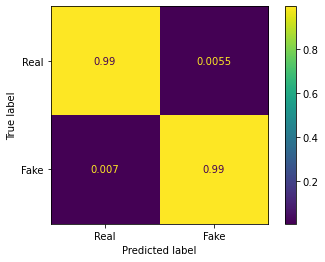

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

true=[]
predictions=[]
with torch.no_grad():
    model.eval()
    for data in testloader:
        if next(model.parameters()).is_cuda:
            data = [t.to(device) for t in data if t is not None]
            
        tokens_tensors, segments_tensors, masks_tensors = data[:3]
        test_outputs = model(input_ids=tokens_tensors, 
                    token_type_ids=segments_tensors, 
                    attention_mask=masks_tensors)

        logits = test_outputs[0]
        _, pred = torch.max(logits.data, 1)

        labels = data[3]
        true.extend(labels.cpu().tolist())
        predictions.extend(pred.cpu().tolist())


cm = confusion_matrix(true, predictions, labels=[1, 0], normalize='pred')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
disp.plot()

print('Acc: ', accuracy_score(predictions,true))

In [34]:
df = pd.DataFrame({"pred_label": predictions})

df_pred = pd.concat([testset.df.loc[:, ['title']], 
                          testset.df.loc[:, ['true']], 
                          df.loc[:, 'pred_label']], axis=1)
# df_pred.to_csv('bert_1_prec_training_samples.csv', index=False)
df_pred

,title,true,pred_label
0,"BOOM! TED CRUZ, DESANTIS PUSH For Term Limits:...",0,0
1,Court nominee was not commenting on Trump's tw...,1,1
2,WHY IT’S GOOD NEWS For Conservatives That Bitt...,0,0
3,Ex-KKK Grand Wizard: Maine Gov. Right To Call...,0,0
4,Voting to elect president of South Africa’s AN...,1,1
...,...,...,...
8975,California voting expert bares naked truth abo...,1,1
8976,"Still Butthurt About 2011 Event, Trump Refuse...",0,0
8977,Trump says he will negotiate with Democrats on...,1,1
8978,Q&A: What we know about U.S. probes of Russian...,1,1


In [36]:
from sklearn.metrics import classification_report
print(classification_report(df_pred.true, df_pred.pred_label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4704
           1       0.99      0.99      0.99      4276

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



## Insight on Wrong Classification

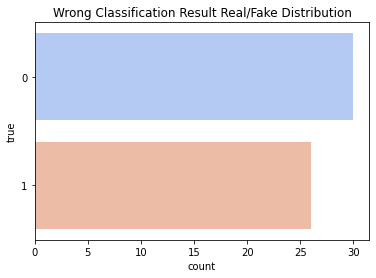

In [37]:
wrong_df = df_pred[df_pred.true != df_pred.pred_label]
sns.countplot(y="true", palette="coolwarm", data=wrong_df).set_title('Wrong Classification Result Real/Fake Distribution')
plt.show()

In [38]:
wrong_titles = df_pred[df_pred.true != df_pred.pred_label].title.values
wrong_titles

array([' Democrats SUE Republicans Over Plot To Rig Election',
       ' Alabama Republican House Speaker Removed From Office, Convicted On Ethics Violations',
       ' Trump-Backed Republican Candidate Bodyslams Journalist Night Before Election',
       'PRESIDENT AND FIRST LADY SHINE AT G7 Opening Ceremony in Ancient Greek Theatre',
       'U.S. lawmakers introduce bill to criminalize ‘revenge porn’',
       ' Trump Executive Order Mandates Two Regulation Cuts For Every New One Created',
       ' Members Of Intel Committee Say Russia Scandal Could Result In Jail Time',
       'Trump overshadows Republican debate even as he sits it out',
       ' Economists Warn Trump Would CRASH The Global Economy',
       ' Hillary Clinton Says Half Her Cabinet Will Be Women If Elected President',
       'Latest Hillary Clinton bio for kids highlights successes and failures',
       'Protesters keeping kids away from Cleveland Republican convention',
       "Blue-collar Democrats to party: It's still